In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('../data/preprocessed_pass_1.csv')

In [3]:
data

,match,rally,ball_round,roundscore_player,roundscore_opponent,player,server,ball_location_x,ball_location_y,ball_height,...,time,ball_type,launching_height,landing_location_x,landing_location_y,player_defend_x,player_defend_y,landing_height,winner,lose_reason
0,1,1,1,0,0,B,1,-47.500000,180.000000,100.000000,...,0.000000,發短球,NaN,166.975584,382.695252,260.177070,821.473839,0.0,NaN,NaN
1,1,1,2,0,0,A,2,22.678129,6.155891,141.087623,...,0.616667,長球,NaN,260.177070,980.473839,177.500000,315.000000,0.0,NaN,NaN
2,1,1,3,0,0,B,3,75.821706,467.161668,149.541064,...,2.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,出界
3,1,2,1,1,0,A,1,7.500000,160.000000,100.000000,...,2.700000,發短球,NaN,122.858940,599.327769,96.671969,356.548975,0.0,NaN,NaN
4,1,2,2,0,1,B,2,-35.563241,6.284815,147.436638,...,3.216667,放小球,NaN,96.671969,356.548975,103.657340,544.890324,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1,19,21,11,7,B,3,-4.764618,7.368605,147.948259,...,245.733333,長球,NaN,69.004392,507.230961,108.643226,821.102814,0.0,A,落地得分
215,1,20,1,8,11,A,1,-62.500000,160.000000,100.000000,...,247.866667,發短球,NaN,120.693169,596.017209,107.918534,188.157176,0.0,NaN,NaN
216,1,20,2,11,8,B,2,-8.523789,4.314046,147.436560,...,248.383333,挑球,NaN,107.918534,188.157176,271.905892,764.978576,0.0,NaN,NaN
217,1,20,3,8,11,A,2,67.284862,261.169138,147.820394,...,250.233333,長球,NaN,271.905892,764.978576,310.447311,239.910794,0.0,NaN,NaN


### Length of rallys

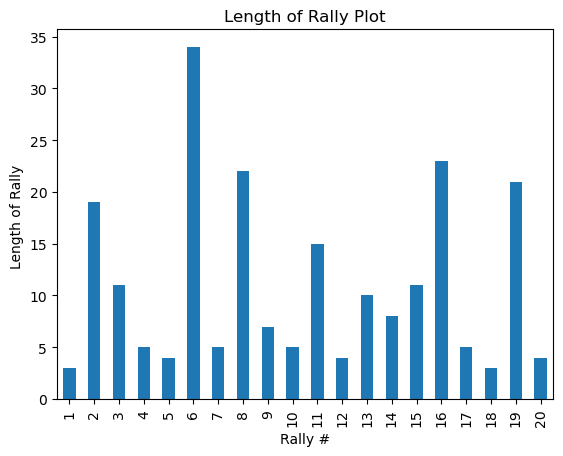

In [4]:
rally_lengths = data['rally'].astype(int).value_counts().sort_index()
rally_lengths.plot(kind='bar')
plt.xlabel('Rally #')
plt.ylabel('Length of Rally ')
plt.title('Length of Rally Plot')
plt.show()


### Player Movement Plot

In [11]:

def calculate_total_distance(x_coords, y_coords, conversion_factor):
    # Ensure the coordinates are in a numpy array for efficient calculations
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    
    # Calculate the differences between consecutive coordinates
    dx = np.diff(x_coords)
    dy = np.diff(y_coords)
    
    # Compute the Euclidean distance for each pair of consecutive points
    distances = np.sqrt(dx**2 + dy**2)
    
    # Sum up the distances to get the total distance covered in units
    total_distance_units = np.sum(distances)
    
    # Convert the total distance from units to meters
    total_distance_meters = total_distance_units * conversion_factor
    
    return total_distance_meters

In [13]:
conversion_factor = 5.18 / 400
total_distance = calculate_total_distance(data['playerA_location_x'], data['playerA_location_y'], conversion_factor)
print(f"Total distance covered by the player A: {total_distance} meters")

Total distance covered by the player A: 365.75870334989105 meters


In [14]:
total_distance = calculate_total_distance(data['playerB_location_x'], data['playerB_location_y'], conversion_factor)
print(f"Total distance covered by the player B: {total_distance} meters")

Total distance covered by the player B: 396.61245658504566 meters


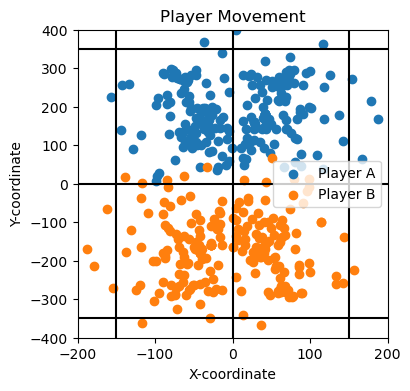

In [5]:
plt.figure(figsize=(4, 4))
plt.scatter(data['playerA_location_x'], data['playerA_location_y'], label='Player A')
plt.scatter(data['playerB_location_x'], data['playerB_location_y'], label='Player B')
plt.axvline(0,color='black')
plt.axvline(150,color='black')
plt.axvline(-150,color='black')
plt.axhline(0, color='black')
plt.axhline(350, color='black')
plt.axhline(-350, color='black')
plt.title('Player Movement')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xlim(-200, 200)  # Set the limits for the x-axis
plt.ylim(-400, 400)
# plt.xticks(range(-200, 200, 100))
# plt.yticks(range(-400, 400, 200))
plt.legend()
plt.show()



### Ball Type Distribution

In [6]:
ball_type_mapping = {
    '放小球': 'net shot', 
    '擋小球': 'return net',
    '殺球': 'smash',
    '點扣': 'wrist smash',
    '挑球': 'lob',
    '防守回挑': 'defensive return lob',
    '長球': 'clear',
    '平球': 'drive',
    '小平球': 'driven flight',
    '後場抽平球': 'back-court drive',
    '切球': 'drop',
    '過渡切球': 'passive drop',
    '推球': 'push',
    '撲球': 'rush',
    '防守回抽': 'defensive return drive',
    '勾球': 'cross-court net shot',
    '發短球': 'short service',
    '發長球': 'long service'
    }

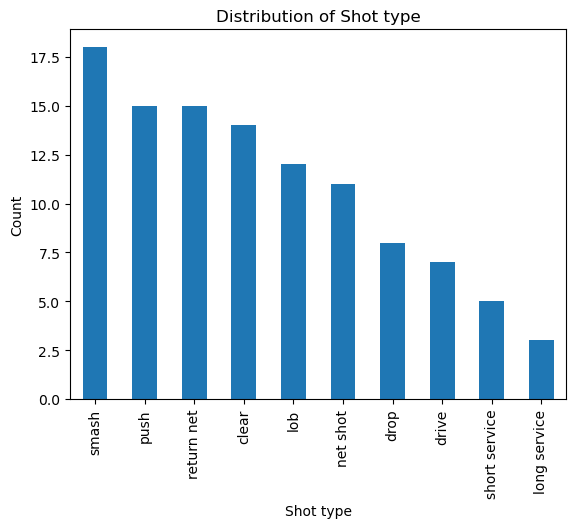

In [7]:
player = 'A'
mapped_data = data[data['player'] == player]['ball_type'].map(ball_type_mapping)
ball_type_dist = mapped_data.value_counts()
ball_type_dist.plot(kind='bar')
plt.xlabel('Shot type')
plt.ylabel('Count')
plt.title('Distribution of Shot type')
plt.show()

In [8]:
winning_point_data = data[(data['server']==3)]
winning_point_data = winning_point_data.append(data.iloc[-1])
winning_point_data

/var/folders/5y/nm55z3vs3q72_gcmp1j45hmr0000gn/T/ipykernel_61598/2207552044.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winning_point_data = winning_point_data.append(data.iloc[-1])


,match,rally,ball_round,roundscore_player,roundscore_opponent,player,server,ball_location_x,ball_location_y,ball_height,...,time,ball_type,launching_height,landing_location_x,landing_location_y,player_defend_x,player_defend_y,landing_height,winner,lose_reason
2,1,1,3,0,0,B,3,75.821706,467.161668,149.541064,...,2.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,出界
21,1,2,19,1,0,A,3,14.092950,175.610150,149.452396,...,23.183333,殺球,NaN,210.989492,434.138325,104.076759,419.791084,0.0,B,落地得分
32,1,3,11,1,1,B,3,-53.843163,41.265940,149.411366,...,34.416667,放小球,NaN,249.098766,597.449760,281.743847,816.748497,0.0,A,落地得分
37,1,4,5,2,1,A,3,-80.136617,109.772633,147.138754,...,40.633333,挑球,NaN,261.595868,471.439805,244.043737,432.257053,0.0,B,落地得分
41,1,5,4,2,2,A,3,59.574013,139.309132,149.680859,...,45.900000,切球,NaN,308.983775,980.266329,177.500000,315.000000,0.0,B,出界
75,1,6,34,2,3,A,3,6.978126,106.583263,149.857735,...,86.400000,放小球,NaN,294.853004,478.366100,134.336041,589.837334,0.0,B,落地得分
80,1,7,5,4,2,B,3,-33.443772,232.623359,147.637816,...,92.483333,發長球,NaN,142.820354,287.903854,336.636102,711.753464,0.0,A,落地得分
102,1,8,22,4,3,B,3,9.630421,91.120927,148.072083,...,115.016667,挑球,NaN,98.157141,521.823013,43.576997,670.211433,0.0,A,落地得分
109,1,9,7,4,4,A,3,-63.183509,167.525597,147.483007,...,124.583333,殺球,NaN,-88.853434,471.841000,197.170531,412.958801,0.0,B,出界
114,1,10,5,5,4,B,3,-76.850585,258.255196,149.939817,...,131.233333,發長球,NaN,89.747863,373.544465,15.965968,703.712936,0.0,A,落地得分


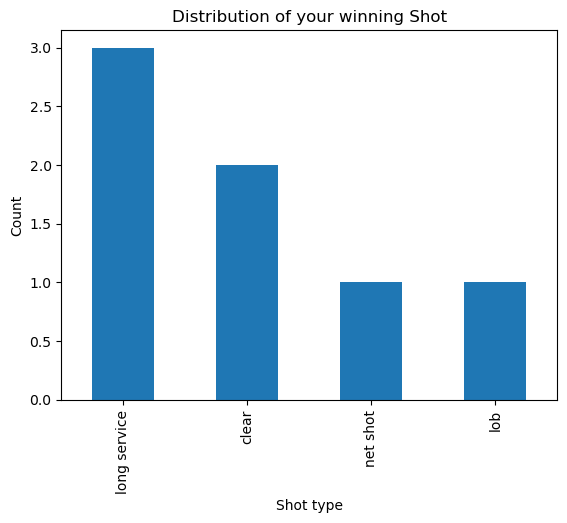

In [9]:
player_winning_data = winning_point_data[winning_point_data['winner']=='A']
player = 'A'
mapped_data = player_winning_data['ball_type'].map(ball_type_mapping)
ball_type_dist = mapped_data.value_counts()
ball_type_dist.plot(kind='bar')
plt.xlabel('Shot type')
plt.ylabel('Count')
plt.title('Distribution of your winning Shot')
plt.show()

In [10]:
player_winning_data

,match,rally,ball_round,roundscore_player,roundscore_opponent,player,server,ball_location_x,ball_location_y,ball_height,...,time,ball_type,launching_height,landing_location_x,landing_location_y,player_defend_x,player_defend_y,landing_height,winner,lose_reason
2,1,1,3,0,0,B,3,75.821706,467.161668,149.541064,...,2.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,出界
32,1,3,11,1,1,B,3,-53.843163,41.265940,149.411366,...,34.416667,放小球,NaN,249.098766,597.449760,281.743847,816.748497,0.0,A,落地得分
80,1,7,5,4,2,B,3,-33.443772,232.623359,147.637816,...,92.483333,發長球,NaN,142.820354,287.903854,336.636102,711.753464,0.0,A,落地得分
102,1,8,22,4,3,B,3,9.630421,91.120927,148.072083,...,115.016667,挑球,NaN,98.157141,521.823013,43.576997,670.211433,0.0,A,落地得分
114,1,10,5,5,4,B,3,-76.850585,258.255196,149.939817,...,131.233333,發長球,NaN,89.747863,373.544465,15.965968,703.712936,0.0,A,落地得分
162,1,15,11,9,5,B,3,9.686942,97.406713,149.880755,...,184.950000,長球,NaN,256.767420,491.798512,153.011834,563.065781,0.0,A,落地得分
190,1,17,5,10,6,B,3,-46.313388,222.202786,147.572164,...,218.150000,發長球,NaN,236.493011,320.626082,175.008742,530.814402,0.0,A,落地得分
214,1,19,21,11,7,B,3,-4.764618,7.368605,147.948259,...,245.733333,長球,NaN,69.004392,507.230961,108.643226,821.102814,0.0,A,落地得分


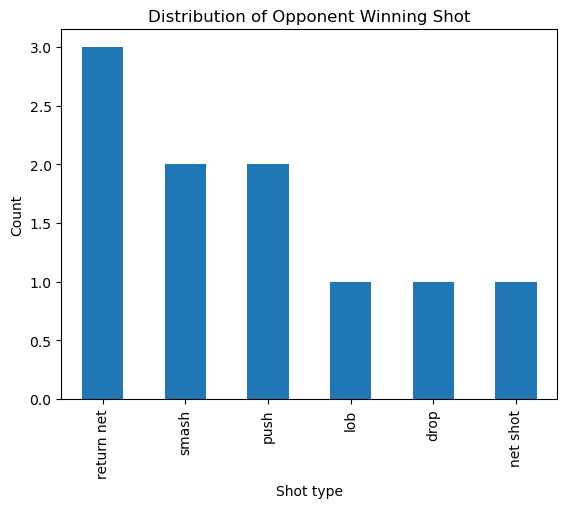

In [11]:
player_losing_data = winning_point_data[winning_point_data['winner']=='B']
mapped_data = player_losing_data['ball_type'].map(ball_type_mapping)
ball_type_dist = mapped_data.value_counts()
ball_type_dist.plot(kind='bar')
plt.xlabel('Shot type')
plt.ylabel('Count')
plt.title('Distribution of Opponent Winning Shot')
plt.show()

In [12]:
ball_type = '殺球'
ball_type_data = data[(data['player'] == 'A') & (data['ball_type'] == ball_type)]


In [13]:
colors = []
for winner in ball_type_data['winner']:
    if winner == 'A':
        colors.append('blue')  # Assign blue if winner is 'A'
    elif winner == 'B':
        colors.append('red')   # Assign red if winner is 'B'
    else:
        colors.append('green') 

In [14]:
mean_ball_height = data['ball_height'].mean()

/Users/mihirthalanki/anaconda3/envs/e4_Badminton_Project/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(0.0, 400.0)

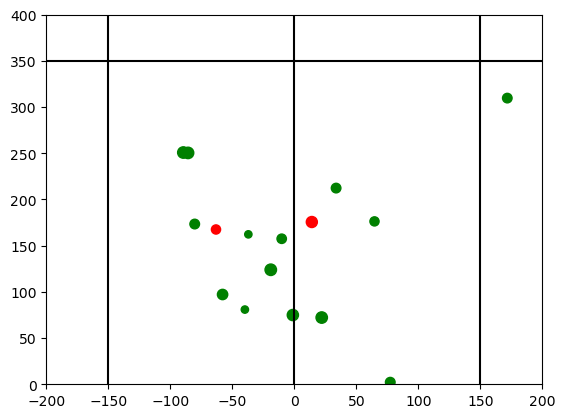

In [15]:
plt.scatter(ball_type_data['ball_location_x'], ball_type_data['ball_location_y'], s=(ball_type_data['ball_height']-mean_ball_height)*10, c=colors)
plt.axvline(0,color='black')
plt.axvline(150,color='black')
plt.axvline(-150,color='black')
plt.axhline(350, color='black')
plt.xlim(-200, 200)  # Set the limits for the x-axis
plt.ylim(0, 400)

In [16]:
ball_type_data

,match,rally,ball_round,roundscore_player,roundscore_opponent,player,server,ball_location_x,ball_location_y,ball_height,...,time,ball_type,launching_height,landing_location_x,landing_location_y,player_defend_x,player_defend_y,landing_height,winner,lose_reason
7,1,2,5,1,0,A,2,77.350914,2.223579,147.939771,...,6.033333,殺球,NaN,139.753621,618.955226,227.097849,365.812153,0.0,NaN,NaN
21,1,2,19,1,0,A,3,14.092950,175.610150,149.452396,...,23.183333,殺球,NaN,210.989492,434.138325,104.076759,419.791084,0.0,B,落地得分
51,1,6,10,2,3,A,2,-19.014466,123.932187,149.943947,...,57.766667,殺球,NaN,198.205234,752.328514,218.694704,380.513657,0.0,NaN,NaN
53,1,6,12,2,3,A,2,-39.893238,80.852405,145.894389,...,60.216667,殺球,NaN,130.225116,627.549805,197.205717,435.639784,0.0,NaN,NaN
57,1,6,16,2,3,A,2,33.674140,212.328774,147.876927,...,64.733333,殺球,NaN,161.454769,638.878700,120.875878,336.733723,0.0,NaN,NaN
69,1,6,28,2,3,A,2,171.733533,309.710392,147.826148,...,79.250000,殺球,NaN,144.484281,557.043556,303.744853,391.610512,0.0,NaN,NaN
85,1,8,5,3,4,A,2,-52.059701,5.982134,142.863533,...,97.000000,殺球,NaN,247.048996,730.631309,164.022839,436.021736,0.0,NaN,NaN
87,1,8,7,3,4,A,2,-0.236264,1.999017,140.785693,...,98.933333,殺球,NaN,109.668137,612.074280,211.130616,339.733826,0.0,NaN,NaN
95,1,8,15,3,4,A,2,-10.195351,157.495281,147.705914,...,108.450000,殺球,NaN,202.814235,728.471039,219.616028,438.897373,0.0,NaN,NaN
99,1,8,19,3,4,A,2,-80.350735,173.424277,147.906693,...,112.500000,殺球,NaN,294.997706,644.617500,190.833651,407.313894,0.0,NaN,NaN
